In [35]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import numpy,sys,os
import datetime as dtm
import matplotlib as mpl
import matplotlib.dates as mpd, pytz
import pylab as plt
import math,random
#
import multiprocessing as mpp
import json
import pickle
#
import cartopy
#
import nETAS_compute
import nETAS_mapper
import contours2kml
from yodiipy import ANSStools as atp


In [37]:
#
n_cpu = mpp.cpu_count()
# some eq parameters:
to_dt = dtm.datetime.now(pytz.timezone('UTC'))
#
Lr_factor = 10.
#
t0 = dtm.datetime.now(pytz.timezone('UTC'))
t_ms = t0
#
# sacramento:
lat0 = 38.5816
lon0 = -121.4944
ll_sacramento = (lon0, lat0)
#
d_lat=5.
d_lon=5.
#
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]
#
to_dt = t0
#
eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
               't_now':to_dt-dtm.timedelta(days=10), 't_future':to_dt ,
               'lats': lats, 'p_cat': 1.1, 'b1': 1.0, 'mc': 2.5, 'q_cat': 1.5,
               'p_etas':1.1, 'q_etas':1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76, 'etas_range_padding':1.5,
            'etas_range_factor':30.0, 'ab_ratio_expon':.25 }
#eq_prams.update({'mc':3.0, 'd_lat':.25, 'd_lon':.25})
#
event_name = 'NorCal_general'
f_path = '/home/myoder/Dropbox/Research/etas/{}/etas_{}'.format(event_name, to_dt)
#
if not os.path.isdir(f_path):
    f_path = os.path.join(os.environ['HOME'], 'etas/{}/etas_{}'.format(event_name, to_dt))

f_root = f'etas_{event_name}_2021_07'

In [38]:
mycat = None
mycat = atp.cat_from_anss_comcat(lon=lons, lat=lats, minMag=eq_prams['mc'],
                        dates0=[dtm.datetime.now(pytz.timezone('UTC'))-dtm.timedelta(days=3650), 
                                dtm.datetime.now(pytz.timezone('UTC'))],
                            Nmax=None, fout=None, rec_array=True, verbose=True)
#                        dates0=[dtm.datetime(2005,1,1, tzinfo=tzutc), None], Nmax=None, fout=None, rec_array=True)

mycat = nETAS_compute.make_ETAS_catalog_mpp(incat=mycat, n_cpu=n_cpu)

*** DEBUG: https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=2011-07-12T22:37:55&endtime=2021-07-09T22:37:55&minmagnitude=2.5&minlatitude=33.5816&maxlatitude=43.5816&minlongitude=-126.4944&maxlongitude=-116.4944&eventtype=earthquake&orderby=time
etas_prams:  {'incat': None, 'lats': [32.0, 38.0], 'lons': [-117.0, -114.0], 'mc': 2.5, 'date_range': [datetime.datetime(1990, 1, 1, 0, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2021, 7, 9, 22, 36, 35, 343988, tzinfo=<UTC>)], 'D_fract': 1.5, 'd_lambda': 1.76, 'd_tau': 2.28, 'fit_factor': 1.5, 'p': 1.1, 'q': 1.5, 'dmstar': 1.0, 'b1': 1.0, 'b2': 1.5, 'do_recarray': False}
results fetched.


In [56]:
class nETAS_xyz(nETAS_compute.ETAS_mpp, nETAS_mapper.nETAS_mapper):
    def __init__(*args, **kwargs):
        nETAS_compute.ETAS_mpp.__init__(*args, **kwargs)
    #

In [57]:

#n_cpu=5
#etas = nETAS_compute.ETAS_mpp(n_cpu=n_cpu, **eq_prams)
etas = nETAS_xyz(n_cpu=n_cpu, **eq_prams)

#
# we've run this; we can reload it from pickle:
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas = pickle.load(fin)
#


begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2011-07-02 22:37:49.665858+00:00
fetch and process catalog for dates: 2011-07-02 22:37:49.665858+00:00-2021-06-29 22:37:49.665858+00:00, mc=2.5, lats=[33.5816, 43.5816], lons=[-126.4944, -116.4944]
etas_prams:  {'incat': None, 'lats': [33.5816, 43.5816], 'lons': [-126.4944, -116.4944], 'mc': 2.5, 'date_range': [datetime.datetime(2011, 7, 2, 22, 37, 49, 665858, tzinfo=<UTC>), datetime.datetime(2021, 6, 29, 22, 37, 49, 665858, tzinfo=<UTC>)], 'D_fract': 1.5, 'd_lambda': 1.76, 'd_tau': 2.28, 'fit_factor': 1.0, 'p': 1.1, 'q': 1.5, 'dmstar': 1.0, 'b1': 1.0, 'b2': 1.5, 'do_recarray': False}
results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 12941], None)
make_etas():
etas_mpp worker xyz_range:  [0, 1250]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. u

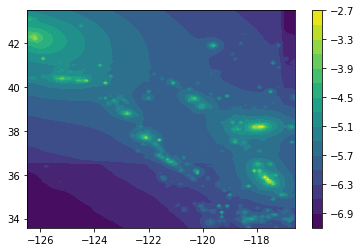

In [58]:
conts = etas.calc_etas_contours()


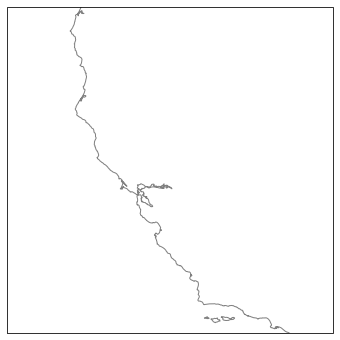

In [61]:
zz = etas.draw_map()
